<a href="https://colab.research.google.com/github/PreethiR091/Preethi-24BAD091/blob/main/Preethi_R_24BAD091_ML_Ex_no_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preethi R 24BAD091

SCENARIO 1 RESULTS
MSE : 210.7736942056698
RMSE: 14.518047189814125
R2  : 0.016760414260791334
                       Feature  Coefficient
0                  study_hours     0.020871
1                   attendance    -0.613270
2  parental level of education    -1.024239
3      test preparation course    -3.834893
4                  sleep_hours    -0.148289
Ridge Coefficients: [ 0.0210846  -0.6124726  -1.02308138 -3.83007758 -0.14812331]
Lasso Coefficients: [ 0.         -0.56183449 -0.97373169 -3.78732163 -0.09914533]


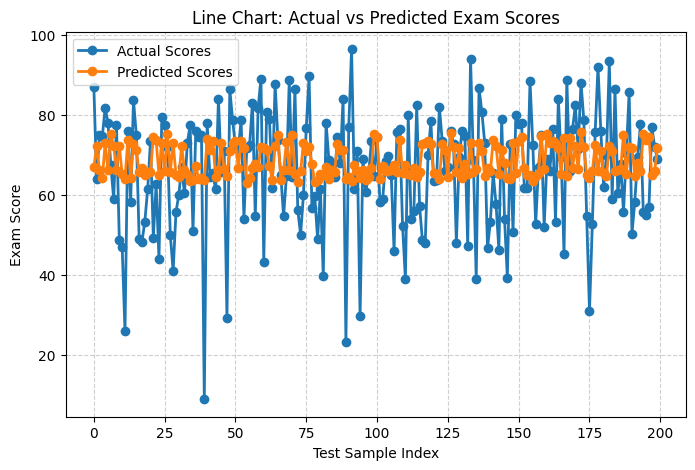

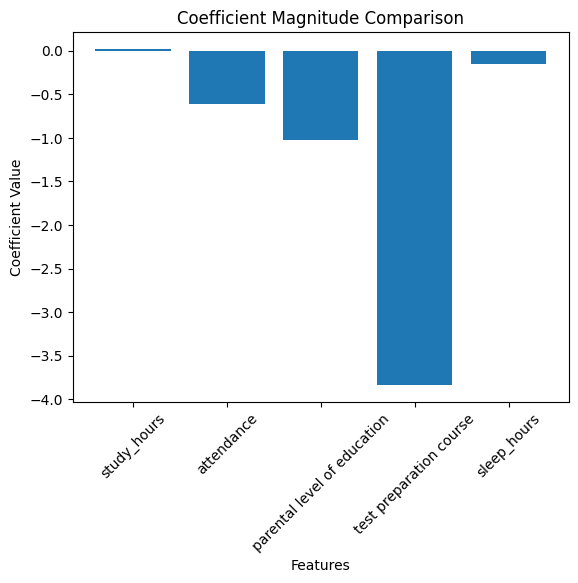

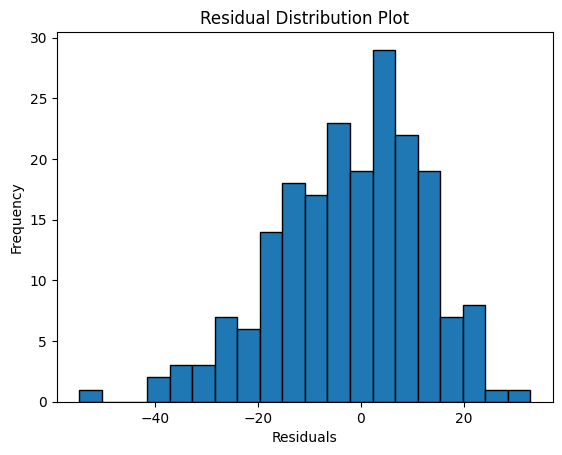

In [ ]:
# EXPT NO: 3 – Scenario 1
# Multilinear Regression]
print("Preethi R 24BAD091\n")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset
df = pd.read_csv("StudentsPerformance.csv")

# Encode Categorical Features
df['parental level of education'] = df['parental level of education'].astype('category').cat.codes
df['test preparation course'] = df['test preparation course'].astype('category').cat.codes

# Simulate Academic, Behavioral & Lifestyle Features
np.random.seed(42)
df['study_hours'] = np.random.randint(1, 8, size=len(df))
df['attendance'] = np.random.randint(60, 100, size=len(df))
df['sleep_hours'] = np.random.randint(5, 9, size=len(df))

# Compute Target Variable
df['final_score'] = (df['math score'] +
                     df['reading score'] +
                     df['writing score']) / 3

# Select Features and Target
X = df[['study_hours',
        'attendance',
        'parental level of education',
        'test preparation course',
        'sleep_hours']]

y = df['final_score']

# Handle Missing Values
X = X.fillna(X.mean())

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Train Multilinear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("SCENARIO 1 RESULTS")
print("MSE :", mse)
print("RMSE:", rmse)
print("R2  :", r2)

# Coefficient Analysis
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coeff_df)

# Ridge & Lasso Regularization
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

print("Ridge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)

# Line Chart: Actual vs Predicted Scores
plt.figure(figsize=(8, 5))

plt.plot(range(len(y_test)), y_test.values,
         marker='o', linewidth=2, label="Actual Scores")

plt.plot(range(len(y_pred)), y_pred,
         marker='o', linewidth=2, label="Predicted Scores")

plt.xlabel("Test Sample Index")
plt.ylabel("Exam Score")
plt.title("Line Chart: Actual vs Predicted Exam Scores")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


# Coefficient Magnitude Comparison
plt.figure()
plt.bar(coeff_df['Feature'], coeff_df['Coefficient'])
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Magnitude Comparison")
plt.xticks(rotation=45)
plt.show()

# Residual Distribution Plot
residuals = y_test - y_pred
plt.figure()
plt.hist(residuals,bins=20,edgecolor='black', linewidth=1)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution Plot")
plt.show()



Preethi R 24BAD091


Degree 2
MSE : 18.41696779601779
RMSE: 4.291499481069267
R2  : 0.6391701147013311

Degree 3
MSE : 18.460267222224626
RMSE: 4.296541309265469
R2  : 0.6383217814053861

Degree 4
MSE : 18.268226874853184
RMSE: 4.274134634619409
R2  : 0.6420842844016577


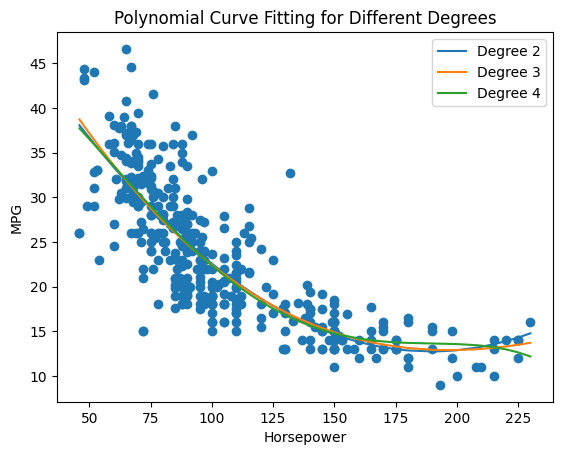

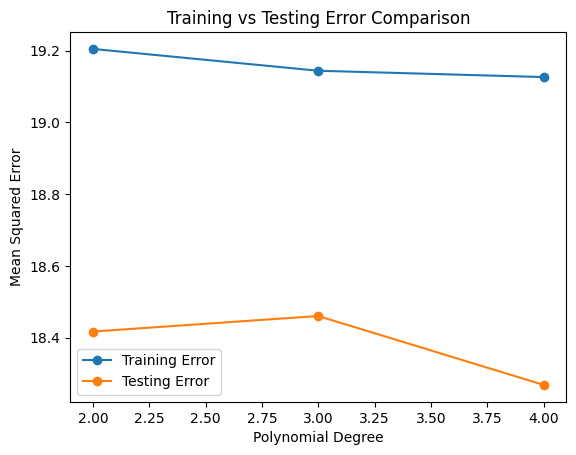

In [2]:
# EXPT NO: 3 – Scenario 2
# Polynomial Regression

print("Preethi R 24BAD091\n")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset
df = pd.read_csv("auto-mpg.csv")

# Data Cleaning
df = df.replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()

# Select Feature and Target
X = df[['horsepower']]
y = df['mpg']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

train_errors = []
test_errors = []

# Polynomial Regression for Degree 2, 3, 4
for degree in [2, 3, 4]:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    scaler = StandardScaler()
    X_poly_train = scaler.fit_transform(X_poly_train)
    X_poly_test = scaler.transform(X_poly_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

    print(f"\nDegree {degree}")
    print("MSE :", mean_squared_error(y_test, y_test_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
    print("R2  :", r2_score(y_test, y_test_pred))

# Ridge Regression (Overfitting Control)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly = scaler.fit_transform(X_poly)

ridge = Ridge(alpha=1.0)
ridge.fit(X_poly, y)

# Graph 1: Polynomial Curve Fitting for Different Degrees
plt.figure()

X_sorted = pd.DataFrame(
    np.sort(X.values, axis=0),
    columns=X.columns
)

for degree in [2, 3, 4]:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    scaler = StandardScaler()
    X_poly = scaler.fit_transform(X_poly)

    model = LinearRegression()
    model.fit(X_poly, y)

    X_poly_sorted = poly.transform(X_sorted)
    X_poly_sorted = scaler.transform(X_poly_sorted)

    y_curve = model.predict(X_poly_sorted)

    plt.plot(X_sorted, y_curve, label=f"Degree {degree}")

plt.scatter(X, y)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Curve Fitting for Different Degrees")
plt.legend()
plt.show()

# Graph 2: Training vs Testing Error Comparison
plt.figure()
plt.plot([2, 3, 4], train_errors, marker='o', label="Training Error")
plt.plot([2, 3, 4], test_errors, marker='o', label="Testing Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Training vs Testing Error Comparison")
plt.legend()
plt.show()
